# Czym wgl jest NLP?
![Czym jest NLP](https://7wdata.be/wp-content/uploads/2021/09/DCF_NLP-in-the-Data-Center_ML-DL-Diagram.png)

NLP - Natural Language Processing to dział AI zajmujący się przetwarzaniem języka naturalnego. Czyli takie rzeczy jak:
* Generowanie artykułów
* Podsumowywanie tekstu
* POS (part of speach tagging)
* Przetwarzanie zbiorów danych
* Automatyczne Question anwsering
itp... Ogólnie wszystko powiązanego z językami, którymi się posługują ludzie.
Na codzień mamy doczynienia z tekstem więc nic dziwnego, że jest to tak istotna i prężnie rozwijająca się działka AI.
W związku z tym że korzystamy z komputerów pojawiają się problemy jak reprezentować ten tekst, jak go przetwarzać.

# Jak reprezentować tekst - podstawowe sposoby

## OneHotEncoding
Najprostszym sposobem jest już znany wam pewnie OneHotEncoding. Robimy to w następujący sposób:
1) tworzymy słownik ze słowami zawierającymi się w naszym zbiorze $V=(słowo_1,słowo_2,\dots,słowo_k)$
2) reprezentujemy dany tekst na podstawie wektora 0 i 1, gdzie 0 dajemy jeżeli wystąpiło dane słowo
czyli 
$$T = (a_1,a_2,\dots,a_{|V|}) \quad \text{gdzie } a_i =\begin{cases} 0 \text{ gdy }słowo_i\not\in Tekst\\  1 \text{ gdy }słowo_i\in Tekst\end{cases}$$
Gdzie V to nasz słownik, a T to reprezentacja.


In [ ]:
def create_vocab(text):
    words = text.split()
    vocab = list(set(words))
    return vocab

def encode_text(text, vocab):
    text_words = set(text.split())
    return [word in text_words for word in vocab]

In [ ]:
text = "Ala ma psa"
text2 = "Maciek nie ma psa"

vocab = create_vocab(text)
encode_text(text2, vocab), vocab

### Bag of Words
Wadą naszego porzedniego rozwiązania jest to, że tylko sprawdza czy słowo wystąpiło, dlatego teraz dodatkowo będziemy zliczali liczbę wystąpień słów.
1) tworzymy słownik ze słowami zawierającymi się w naszym zbiorze $V=(słowo_1,słowo_2,\dots,słowo_k)$
2) reprezentujemy dany tekst na podstawie wektora wystąpień słów ze słownika w tekście
czyli 
$$T = (a_1,a_2,\dots,a_{|V|}) \quad \text{gdzie } a_i-\text{liczba wystąpień }słowa_i\text{ w tekście}$$
Gdzie V to nasz słownik, a T to reprezentacja.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [ ]:
twenty_train.data[0]

In [ ]:
vectorizer = CountVectorizer().fit(twenty_train.data)

In [ ]:
vectorizer.vocabulary_

In [ ]:
transformed = vectorizer.transform(twenty_train.data[:1])
transformed

In [ ]:
vectorizer = CountVectorizer().fit(['Ala ma psa'])

In [ ]:
transformed = vectorizer.transform(['Maciek ma psa i ma wiele kotów, które nie lubią psów'])

In [ ]:
transformed.toarray()
# Zauważcie pierwszy problem, psów i psy mają tak naprawdę to samo znaczenie ale przez to
# że są w innej odmianie nie są zliczane.

### TF-IDF (Term Frequency Inverse Document Frequency)
Zauważmy, że wadą zliczania jest to, że mogą występować w naszym zbiorze teksty, w których często powtarza się
to samo słowo i wtedy to że np. słowo "paragraf" wystąpiło 2137 za dużo nie znaczy. Z pomocą nadchodzi TF-IDF, który waży liczności
w zależności od tego w ilu dokumentach dane słowo wystąpiło, czyli większe wagi chcemy przywiązywać słowom "rozróżniającym". Niech t oznacza token, d oznacza dokument oraz D-zbiór dokumentów wtedy
\begin{align*}
    &tf(t,d)=\frac{f_{t,d}}{\sum_{t'\in d} f_{t',d}}\\
    &idf(t,D)=\log\frac{N}{|\{d\in D;\,t\in d\}}\\
    &tfidf(t,d,D)=tf(t,d)\times idf(t,D)
\end{align*}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer().fit(twenty_train.data)
transformed_data = vectorizer.transform(twenty_train.data)

In [ ]:
transformed_data

#### Challenge!
Korzystając z przedstawionych wcześniej reprezentacji tekstu przeucz drzewo losowe przewidujące klasę newsa

In [ ]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
train_text, train_class = twenty_train.data, twenty_train.target
test_text, test_class = twenty_test.data, twenty_test.target

In [ ]:
#Rozwiązanie


### n-gramy

Zauważmy, że czasem istotną informacją mogą być ciągi słów. Na tym właśnie polegają n-gramy. N-gram jest to ciąg n-słów.

Przykład 2-grama: \["Ala", "ma"\], \["ma", "Psa"\]

In [ ]:
from nltk.util import ngrams

In [ ]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud "

In [ ]:
# funckja ngrams wymaga podania na wejście sekwencji
list(ngrams(text.split(), 3))

Wszystkie wcześniej wymienione sposoby reprezentacji tekstu domyślnie operują na słowach ale mogą operować też na n-gramach

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2)).fit(['Ala ma psa'])
transformed = vectorizer.transform(['Maciek ma psa i ma wiele kotów, które nie lubią psów'])

In [ ]:
vectorizer.get_feature_names()

In [ ]:
transformed.toarray()

Analogicznie dla TFIDF

Wracamy do poprzedniego zadania, spróbujcie poprawić wynik wykorzystując n-gramy, tylko nie przesadzajcie z n bo wam nie starczy RAMu

In [ ]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
train_text, train_class = twenty_train.data, twenty_train.target
test_text, test_class = twenty_test.data, twenty_test.target

In [ ]:
# Rozwiązanie


## Zmniejszanie słownika
### Stop words
W każdym języku znajdują się słowa, które same nie niosą żadnej informacji, czasami warto pozbyć się takich słów, aby zmniejszyć wymiar słownika itp.

Przykłady dla angielskiego: "The" "who"

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stops = set(stopwords.words("english"))

In [ ]:
stops

### Stemming i Lematyzacja

Jak wcześniej zwróciłem uwagę czasami nie interesuje nas odmiana słowa tylko czy samo słowo wystąpiło. Np. chcemy w tekście szukać czy wystąpiła jakakolwiek odmiana słowa "pies" wtedy dokonujemy stemmingu(usunięcia ostatnich znaków ze słowa aby sprowadzić je do podstawowej formy) lub lematyzaji wykorzystującej kontekst

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk

In [ ]:
nltk.download("wordnet")
nltk.download('omw-1.4')


In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
words = [
    "caresses",
    "flies",
    "dies",
    "mules",
    "denied",
    "died",
    "agreed",
    "owned",
    "humbled",
    "sized",
    "meeting",
    "stating",
    "siezing",
    "itemization",
    "sensational",
    "traditional",
    "reference",
    "colonizer",
    "plotted",
]
for word in words:
    lemmatized, stemmed = lemmatizer.lemmatize(word), stemmer.stem(word)
    print(f"{word}\nLemma:{lemmatized} Stemmed:{stemmed}")


## Regex

regex czyli regular expressions to narzędzie pozwalające tworzyć wzorce tekstowe, które potem można wykorzystać np. do usuwania konkretnych wzorców z tekstu w celu filtorwania, wyciąganie emaili z tekstu itd.

In [ ]:
import re

In [ ]:
# Tak się tworzy regexa
pattern = re.compile(r'@gmail.com')

In [ ]:
pattern.findall('kasjhfgasil jfalfhjas lfhaklfj pw@gmail.com')

Jak tworzyć regexy
korzystając z cheat-sheetów

![regex_cheat_sheet](https://media.cheatography.com/storage/thumb/davechild_regular-expressions.750.jpg)

Biblioteka re pozwala na wiele rzeczy [dokumentacja](https://docs.python.org/3/library/re.html)

funkcje:
* __findall__: znajduje wszystkie wystąpienia wzorca
* __search__: zwraca None albo pierwsze wystąpienie wzorca
* __split__
* __sub__

Zadanie: stworzyć regex który wyciąga emaile z tekstu

In [ ]:
pattern = re.compile(r'')
to_search = "asoihfjaos hoasuf oajioah ofijoe pw@edu.pl klajshflakshfjklaj lfhasnoirhj weaoijpoa m abkcp@onet.pl"
pattern.findall(to_search)

##### grupy

In [ ]:
regex_with_group = r'(\w+)@[\w\.]+'
re.findall(regex_with_group, to_search)

In [ ]:
regex_with_group = r'(\w+)@([\w\.]+)'
re.findall(regex_with_group, to_search)

In [ ]:
re.sub(regex_with_group, "\\1@uganda.ug", to_search)

In [ ]:
re.sub(regex_with_group, "ale_jazda@\\2", to_search)

In [ ]:
regex_with_group = r'(\w+)@(?:[\w\.]+)'
re.findall(regex_with_group, to_search)

### Tokenizacja

Poważnym problemem jest w jaki sposób tworzyć tokeny z tekstu:
* znaki oddzielone spacjami?
* znaki oddzielone na znakach interpunkcyjnych?
* rozdzielanie na podstawie regexów?
* inne metody?

#### Oddzielanie spacjami
jest to najprostszy sposób, ale też nie najlepszy, ponieważ np. słowo "won't" będzie jednym tokenem a samo "n't" można też dodać jako oddzielny token

#### oddzielanie na znakach interpunkcyjnych i spacjach
Tutaj dodatkowo rozdzielamy spacją wszystkie znaki interpunkcyjne czyli np. "Ala ma psa." -> \["Ala", "ma", "psa", "."\]

#### oddzielanie na regexach
jest to połączenie poprzednich metod i dodanie specjalnych fraz np. oddzielanie "n't" w języku angielskim.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
word_tokenize("I didn't want to come.")


In [ ]:
text = "Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt. Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur? Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?"

In [ ]:
sent_tokenize(text)

#### Subwords tokenization
Wszystkie poprzednie metody mają problem z nowymi słowami, które mogą się pojawić podczas tokenizacji nowego tekstu. W przypadku poprzednich metod zastępuje się zazwyczaj słowa nie występujące w słowniku przez "<unk>". 

Kolejnym problemem jest wielkość słownika, im więcej słów chcemy posiadać tym większy musi być nasz słownik co prowadzi do coraz większych wymagań pamięciowych w celu operowania na tekstach. 

Problemy te są rozwiązywane przez tokenizatory, który dokonują podziału na tokeny, które nie są całymi słowami tylko ich fragmentami. W takich modelach z góry określa się wielkość słownika. Oczywiście powstaje pytanie jak wybierać ciągu znaków, które będą tokenami.
Przykłady algorytmów
* [Byte-Pair Encoding](https://arxiv.org/abs/1508.07909)
* [WordPiece](https://ai.googleblog.com/2021/12/a-fast-wordpiece-tokenization-system.html)
* [Unigram Language Model](https://arxiv.org/pdf/1804.10959.pdf)
* [SentencePiece](https://jacky2wong.medium.com/understanding-sentencepiece-under-standing-sentence-piece-ac8da59f6b08)

Warto na nie zwrócić uwagę bo wszystkie aktualnie najlepsze modele językowe oparte o sieci neuronowe z nich korzystają ;)

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"], vocab_size=2022, min_frequency=1)

with open("tokenizer_train.txt", 'w') as f:
    for line in twenty_train.data[:100]:
        f.write(line + '\n')

In [ ]:
tokenizer.train(['tokenizer_train.txt'], trainer)

In [ ]:
tokenizer.encode("Czas na tokenizacje.").tokens

Z biblioteką [tokenizers](https://huggingface.co/docs/tokenizers/python/latest/quicktour.html#) dodać wiele różnych rzeczy jak dodawanie specjalnych tokenów na początek koniec, wiele innych pretokenizatorów i wiele innych gotowych tokenizatorów.

### Spacy i problemy lingwistyczne
spacy jest biblioteką zawierającą wiele modeli do problemów lingwistycznych, które teraz sobie krótko omówimy

##### tokenizacja
spacy także posiada tokenizacje

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
#wczytywanie modelu językowego
nlp = spacy.load('en_core_web_sm')
doc = nlp("Akash has been buyed by byju's in 73,000 Core's")
for token in doc:
    print(token.text)

#### Part-Of_Speech (POS) - tagging
problem ten polega na wyjaśnieniu w jaki sposób dane słowo jest wykorzystane w zdaniu. Ustalone jest 8 części mowy (po ang bo będzie łatwiej):
* Noun
* Pronoun
* Adjective
* Verb
* Adverb
* Preposition
* Conjunction
* Interjection

In [ ]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

In [ ]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")
spacy.displacy.render(doc, style="dep" , jupyter=True)

#### Dependency Parsing
Jest to proces tworzenia struktury gramatycznej zdania. Daje on nam zależność słów w zdaniu.

In [ ]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")
 
for token in doc:
    print(token.text, "-->", token.dep_)

#### Named Entity Recogniton
Czyli po prostu wykrywanie nazw własnych

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")
#See the entity present
print(f"Enitites: {doc.ents}")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

#### Entity Recogniton
nazywane też Entity Detection jest bardziej zaawansowany od NER, ponieważ rozpoznaje istotne elementy między innymi miejsca, ludzi, organizacje, języki itp.

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc= nlp(u"""The Amazon rainforest,[a] alternatively, the Amazon Jungle, also known in English as Amazonia, is a moist broadleaf tropical rainforest in the Amazon biome that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 km2 (2,700,000 sq mi), of which 5,500,000 km2 (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations.

The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Bolivia, Ecuador, French Guiana, Guyana, Suriname, and Venezuela. Four nations have "Amazonas" as the name of one of their first-level administrative regions and France uses the name "Guiana Amazonian Park" for its rainforest protected area. The Amazon represents over half of the planet's remaining rainforests,[2] and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.[3]

Etymology
The name Amazon is said to arise from a war Francisco de Orellana fought with the Tapuyas and other tribes. The women of the tribe fought alongside the men, as was their custom.[4] Orellana derived the name Amazonas from the Amazons of Greek mythology, described by Herodotus and Diodorus.[4]

History
See also: History of South America § Amazon, and Amazon River § History
Tribal societies are well capable of escalation to all-out wars between tribes. Thus, in the Amazonas, there was perpetual animosity between the neighboring tribes of the Jivaro. Several tribes of the Jivaroan group, including the Shuar, practised headhunting for trophies and headshrinking.[5] The accounts of missionaries to the area in the borderlands between Brazil and Venezuela have recounted constant infighting in the Yanomami tribes. More than a third of the Yanomamo males, on average, died from warfare.[6]""")

entities=[(i, i.label_, i.label) for i in doc.ents]
entities

In [ ]:
spacy.displacy.render(doc, style = "ent",jupyter = True)

## Reprezentacja słów i sieci neuronowe czyli embeddingi
Embeddingi polegają na zmniejszeniu wymiaru danych tekstowych, aby zakodować ciąg słów o słowniku wielkości 50000 tworzymy macierz o wymiarach seq_len x 50000, co można się domyślić nie jest optymalne, embeddingi sprowadzają dane tekstowe do dużo niższego wymiaru np. 300.

Przykładami embeddingów są:
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://fasttext.cc/)

### Word2Vec
![Word2vec image](https://imgs.developpaper.com/imgs/1091794672-5c7cc60fab3ba_articlex.png)

### Podobieństwo słów
Mając embeddingi słów można badać ich podobieństwo badając ich odległość w przestrzeni, w której się znajdują. Najczęściej wykorzystuje się do tego odległość cosinusową
\begin{align*}
    cos\_sim(A,B) = \frac{A\cdot B}{||A||||B||}=cos(\theta)
\end{align*}
która pokazuje jaki jest kąt między dwoma wektorami, jeżeli 0 wtedy mamy 1 i oznacza to że wektory są tak samo skierowane czyli są podobne.

In [121]:

from gensim.models import Word2Vec

sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# size: (default 100) wymiar przestrzeni embeddingów.
# window: (default 5) okno które będzie wykorzystywane do predykcji lub będzie predykowane.
# min_count: (default 5) minimalna liczba wystąpień słowa aby było uwzględnione w słowniku.
# workers: (default 3) liczba wątków wykorzystana do uczenia.
# sg: (default 0 or CBOW) jaki algorytm ma być wykorzystany do uczenia 0-CBOW, 1-Skip-gram.
model = Word2Vec(sentences, min_count=1)

words = list(model.wv.key_to_index.keys())
print(words)
print(model.wv['sentence'])

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.786960

In [122]:
X = model.wv[words]

In [123]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [124]:
x_transformed = PCA(2).fit_transform(X)

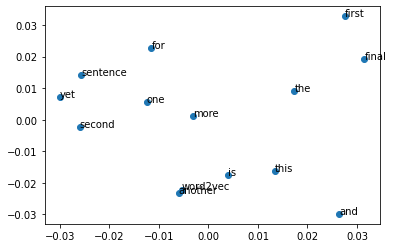

In [127]:
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])

for i, word in enumerate(words):
	plt.annotate(word, xy=(x_transformed[i, 0], x_transformed[i, 1]))